#### TOBIG'S 14기 정규세션 4주차 SVM 
### ASSIGNMENT2
---

 Anomaly detection 데이터셋을 SVM을 이용해서 판별하는 과제로 여러가지 방법을 사용해서 트레이닝 해보고 결과를 비교해주면됩니다!

 데이터 분포 : True : 0.17프로 나머지 다 False, 
 
 Row가 약 28만행이기 때문에 data training 시간이 오래 걸립니다.그래도 자고 일어나면 트레이닝 되어있기는 하는 정도니 여유롭게 과제를 시작해주세요 :)

 아직 익숙하지 않으신 분들은 멘토에게 물어보고 한 가지 방법으로만 구현해도 과제를 반려하지는 않겠습니다!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## 데이터 확인 및 처리

In [4]:
# Anomaly detection(사기감지 데이터) 로드
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/creditcard.csv')
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,284806.000000,284806.000000,284806.000000,284806.000000,2.848060e+05,2.848060e+05,2.848060e+05,2.848060e+05,284806.000000,284806.000000,2.848060e+05,2.848060e+05,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,2.848060e+05,284806.000000,284806.000000
mean,94813.585781,0.000002,6.661837e-07,-0.000002,0.000002,4.405007e-08,0.000002,-0.000006,0.000001,-0.000002,0.000003,0.000004,1.106485e-07,6.604254e-07,2.960486e-07,-1.451290e-07,0.000001,0.000002,-5.878731e-07,8.992685e-07,-0.000001,-9.166149e-07,-0.000002,-0.000001,-3.088756e-08,0.000002,0.000003,8.483873e-09,-4.792707e-08,88.349168,0.001727
std,47488.004530,1.958699,1.651311e+00,1.516257,1.415871,1.380249e+00,1.332273,1.237092,1.194355,1.098634,1.088850,1.020713,9.992031e-01,9.952759e-01,9.585973e-01,9.153176e-01,0.876254,0.849338,8.381776e-01,8.140418e-01,0.770926,7.345251e-01,0.725702,0.624461,6.056481e-01,0.521278,0.482225,4.036332e-01,3.300838e-01,250.120432,0.041527
min,0.000000,-56.407510,-7.271573e+01,-48.325589,-5.683171,-1.137433e+02,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-14.129855,-25.162799,-9.498746e+00,-7.213527e+00,-54.497720,-3.483038e+01,-10.933144,-44.807735,-2.836627e+00,-10.295397,-2.604551,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.250000,-0.920374,-5.985522e-01,-0.890368,-0.848642,-6.915995e-01,-0.768296,-0.554080,-0.208628,-0.643098,-0.535422,-0.762485,-4.055742e-01,-6.485416e-01,-4.255807e-01,-5.828853e-01,-0.468046,-0.483745,-4.988498e-01,-4.563030e-01,-0.211722,-2.283974e-01,-0.542351,-0.161846,-3.545895e-01,-0.317142,-0.326979,-7.083961e-02,-5.295995e-02,5.600000,0.000000
50%,84691.500000,0.018109,6.549621e-02,0.179846,-0.019845,-5.433621e-02,-0.274186,0.040097,0.022358,-0.051429,-0.092913,-0.032757,1.400356e-01,-1.356316e-02,5.060308e-02,4.807416e-02,0.066418,-0.065673,-3.639113e-03,3.736578e-03,-0.062481,-2.945020e-02,0.006781,-0.011196,4.097671e-02,0.016596,-0.052134,1.342244e-03,1.124381e-02,22.000000,0.000000
75%,139320.000000,1.315645,8.037257e-01,1.027198,0.743348,6.119267e-01,0.398567,0.570426,0.327346,0.597140,0.453934,0.739595,6.182391e-01,6.625058e-01,4.931500e-01,6.488220e-01,0.523300,0.399676,5.008082e-01,4.589502e-01,0.133034,1.863701e-01,0.528548,0.147641,4.395270e-01,0.350716,0.240955,9.104579e-02,7.828043e-02,77.160000,0.000000
max,172788.000000,2.454930,2.205773e+01,9.382558,16.875344,3.480167e+01,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,17.315112,9.253526,5.041069e+00,5.591971e+00,39.420904,2.720284e+01,10.503090,22.528412,4.584549e+00,7.519589,3.517346,3.161220e+01,3.384781e+01,25691.160000,1.000000


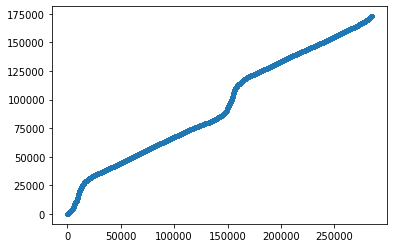

In [7]:
import matplotlib.pyplot as plt
data['Time'].plot(style = '.')
plt.show()

 - 'Time'은 순서가 있는 정보이므로 삭제해준다

In [8]:
#remove column['Time']
data = data.drop(['Time'], axis=1)

 ### 타겟의 비율

In [9]:
data['Class'].value_counts()

0    284314
1       492
Name: Class, dtype: int64

 - 불균형한 데이터임을 확인할 수 있다

### 결측치 및 이상치 확인

In [10]:
data.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

 - 결측치 없음 확인

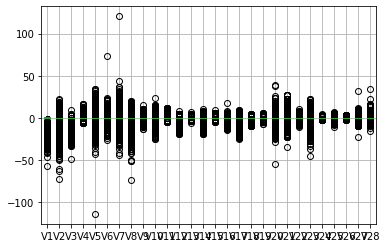

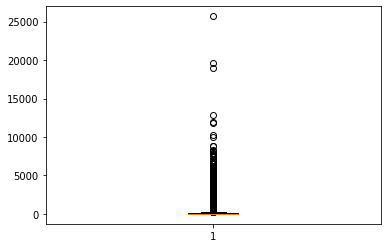

In [11]:
data.drop(['Amount','Class'], axis = 1).boxplot()
plt.show()
plt.boxplot(data['Amount'])
plt.show()

 - V1~V28은 적은 양의 이상치가 확인되고, 중간값과 크게 차이가 나지 않으므로 제거 X
 - Amount의 경우 중간값과 굉장히 많이 차이나는 이상치들이 많이 확인되지만, 많은 정보를 제거할 시 원본 데이터의 특성을 잃어버릴 수 있으므로 제거 X
 - =>정규화 과정을 수행

## 학습 준비 및 모델 설정

In [12]:
X,y = data.drop(['Class'], axis = 1), data['Class']

In [13]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

In [14]:
#train_scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [15]:
#test_scaling
X_test = scaler.transform(X_test)

In [16]:
X_train.shape, y_train.shape

((227844, 29), (227844,))

In [17]:
#oversampling(synthetic minority oversampling technique = SMOTE)
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

sm = SMOTE()

resample_X_train, resample_y_train = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [18]:
print("shape of resample_X:",resample_X_train.shape) 
print("shape of resample_y:",resample_y_train.shape)
print()
print("proportion of original target")
print(pd.Series(y_train).value_counts())
print('proportion of resampled target')
print(pd.Series(resample_y_train).value_counts())

shape of resample_X: (454922, 29)
shape of resample_y: (454922,)

proportion of original target
0    227461
1       383
Name: Class, dtype: int64
proportion of resampled target
1    227461
0    227461
dtype: int64


### 모델 생성

In [19]:
from sklearn.model_selection import cross_validate

In [20]:
# 모델들 생성
svc_original = SVC(kernel = 'linear', gamma = 'scale')
svc_weight = SVC(kernel = 'linear', gamma = 'scale', class_weight='balanced')
svc_resample = SVC(kernel = 'linear', gamma = 'scale')

## 모델 평가

In [21]:
from sklearn.metrics import classification_report

In [22]:
# #original
# svc_original.fit(X_train, y_train)
# y_pred = svc_original.predict(X_test)
# print('Original Case')
# print('Accuracy Score:')
# print(classification_report(y_test,y_pred))


#weight
svc_weight.fit(X_train, y_train)
y_pred = svc_weight.predict(X_test)
print('Weight Case')
print('Accuracy Score:')
print(classification_report(y_test,y_pred))

# #Smote_resample
# svc_resample.fit(resample_X_train, resample_y_train)
# y_pred = svc_resample.predict(X_test)
# print('Resample Case')
# print("Accuracy Score:")
# print(classification_report(y_test,y_pred))


Weight Case
Accuracy Score:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56853
           1       0.07      0.94      0.13       109

    accuracy                           0.98     56962
   macro avg       0.54      0.96      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [23]:
accuracy_score(y_test, y_pred)

0.9769846564376251

다른 모델들과 비교를 하지 못했지만, 가중치를 준 모델의 경우 높은 recall을 보여준다.

시간이 부족해서 기본 모델과, oversampling은 학습을 시키지 못했습니다.